In [1]:
# Imports
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
np.set_printoptions(suppress=False)
#np.set_printoptions(suppress=True)

In [3]:
# Imports from KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard
from keras.layers import Activation
from keras import optimizers

Using TensorFlow backend.


In [4]:
# Imports from TENSOR FLOW
import tensorflow as tf

In [5]:
def TB(cleanup=False):
    import webbrowser
    webbrowser.open('http://127.0.0.1:6006')

    get_ipython().system('tensorboard --logdir="logs"')

    if cleanup:
        get_ipython().system('rm -R logs/')
# TB()

In [6]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


In [7]:
# load data from file

galaxyData = np.loadtxt("CSV_Files/galaxy_feature_vectors.csv", delimiter=",", skiprows=0)

Xdata = galaxyData[:,0:75]
Ydata = galaxyData[:,75:77]

# Using hold-out evaluation

# - Split the data into train and valid, holding 20% of the data for valid and 
# 20% for test
# - We are shuffling the data to avoid ordered data by labels
# - Stratification means that the train_test_split method returns
#   training and test subsets that have the same proportions of class labels as the input dataset.
# - Random_state is desirable for reproducibility.

Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(
    Xdata, Ydata, test_size=0.4, random_state=0, shuffle=True, stratify=Ydata
)
Xvalid, Xtest, Yvalid, Ytest = train_test_split(
    Xvalid, Yvalid, test_size=0.5, random_state=0, shuffle=True, stratify=Yvalid
)

In [8]:
Xdata

array([[ 3.62952000e+05,  4.39309241e+01,  5.10145966e+01, ...,
         2.06875991e-24, -2.64805345e-16,  5.57636020e-24],
       [ 8.30956000e+05,  3.85109441e+01,  5.00756838e+01, ...,
        -1.01958909e-27,  1.37293801e-17,  4.81001774e-27],
       [ 7.26733000e+05,  2.81946369e+01,  4.36395794e+01, ...,
         2.46483380e-26,  4.75665983e-18,  2.00633541e-26],
       ...,
       [ 7.91966000e+05,  1.96666799e+01,  3.50986061e+01, ...,
         4.08121616e-23,  3.48917335e-16, -7.64736611e-24],
       [ 4.65390000e+05,  3.76492448e+01,  4.57498578e+01, ...,
         1.62357951e-23,  5.14674754e-15,  1.09129996e-24],
       [ 7.17216000e+05,  2.38333863e+01,  3.43834022e+01, ...,
         5.64446797e-19,  1.82138651e-12,  2.26843968e-21]])

In [9]:
Xtrain
# 42 columns = inputs

array([[ 6.07451000e+05,  4.66192866e+01,  4.28343789e+01, ...,
         6.05961101e-22,  2.38659823e-14, -1.31445599e-22],
       [ 3.44577000e+05,  4.41353085e+01,  4.98890970e+01, ...,
         3.08305932e-25,  1.23887352e-16, -2.17021545e-25],
       [ 9.60786000e+05,  4.71221163e+01,  4.00243230e+01, ...,
        -5.45125073e-21, -3.24782944e-14,  4.47065533e-21],
       ...,
       [ 1.50683000e+05,  3.66876153e+01,  4.23223498e+01, ...,
         5.59894523e-23,  4.44777565e-15,  7.76420728e-23],
       [ 3.49818000e+05,  2.05297451e+01,  3.30264480e+01, ...,
         2.19416596e-26,  3.19516469e-17,  1.64992222e-26],
       [ 2.81272000e+05,  3.96545024e+01,  3.84021868e+01, ...,
         2.22219255e-23,  9.43855436e-16,  1.02872991e-23]])

In [10]:
Ytrain
# 2 column = outputs

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
Xtrain = scaler.fit_transform(Xtrain)
Xvalid = scaler.fit_transform(Xvalid)
Xtest = scaler.fit_transform(Xtest)

In [12]:
Xtest

array([[7.24751768e-01, 2.20282369e-01, 1.78096588e-01, ...,
        7.39561419e-05, 5.60382842e-04, 3.34074996e-02],
       [4.29827380e-01, 2.61636158e-01, 3.37592713e-01, ...,
        7.39576899e-05, 5.60879034e-04, 3.34075540e-02],
       [6.16184845e-01, 2.97397609e-01, 2.31569833e-01, ...,
        7.39584178e-05, 5.59138475e-04, 3.34072107e-02],
       ...,
       [7.73585199e-01, 3.20111749e-01, 1.85104338e-01, ...,
        7.39594316e-05, 5.61629849e-04, 3.34074917e-02],
       [5.85259452e-01, 4.04839985e-01, 2.65269563e-01, ...,
        7.39789355e-05, 5.64593076e-04, 3.34079133e-02],
       [4.53087591e-01, 2.23495440e-01, 3.68467965e-01, ...,
        7.47258141e-05, 6.50572919e-04, 3.33810679e-02]])

In [13]:

num_classes = Ytrain.shape[1]
input_dim = Xtrain.shape[1]

print ("The dataset number of classes is {} and number of features for input data is {}".format(num_classes, input_dim))

The dataset number of classes is 2 and number of features for input data is 75


In [58]:

def twolayer_model(learning_rate=0.0005):
    # create model
    model = Sequential()
    model.add(Dense(num_classes, input_dim=input_dim, activation='softmax'))
    model.summary()

   # Compile model
    adam=optimizers.Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'] )
    return model


In [59]:
def threelayer_model(nb_perceptrons=100, learning_rate=0.0005):
    # create model
    model = Sequential()
    model.add(Dense(nb_perceptrons, input_dim=input_dim,kernel_initializer="uniform",activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
    model.summary()

    # Compile model
    adam=optimizers.Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'] )
    return model


In [60]:
def fourlayer_model(nb_perceptrons=100, learning_rate=0.0005):
    # create model
   
    model = Sequential()
    model.add(Dense(nb_perceptrons, input_dim=input_dim,kernel_initializer="uniform",activation='relu'))
    model.add(Dense(nb_perceptrons,kernel_initializer="uniform",activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
    model.summary()

    # Compile model
    adam=optimizers.Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'] )
    return model

In [70]:
scores_validation = []
scores_training = []

In [71]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

for i in range(0, 12):
    # variate total number of layers
    if (i == 0): model = twolayer_model()
    if (i == 1): model = threelayer_model()
    if (i == 2): model = fourlayer_model()
    # variate number of perceptions in hidden layers
    if (i == 3): model = fourlayer_model(nb_perceptrons=10)  
    if (i == 4): model = fourlayer_model(nb_perceptrons=50)  
    if (i == 5): model = fourlayer_model(nb_perceptrons=200)
    # variate learning rate
    if (i == 6): model = fourlayer_model(learning_rate=0.0005)  
    if (i == 7): model = fourlayer_model(learning_rate=0.05)  
    if (i == 8): model = fourlayer_model(learning_rate=0.01)  
    # variate epochs is not implemented here but in fitting step
    if (i == 9): model = fourlayer_model()
    if (i == 10): model = fourlayer_model()  
    if (i == 11): model = fourlayer_model()  
        
    # Create variables to Tensorboard tracing
    now = time.strftime("%y%d%mT", time.gmtime())
    tbcallback = TensorBoard(log_dir='./logs/'+str(i), histogram_freq=0, write_graph=True, write_images=True)

    # Fit the model (TRAIN), also change the epochs if that's the hyperparameter we're changing
    if (i < 9):
        model.fit(Xtrain, Ytrain, validation_data=(Xvalid, Yvalid), epochs=60, batch_size=100, callbacks=[tbcallback])
    if (i == 9):
        model.fit(Xtrain, Ytrain, validation_data=(Xvalid, Yvalid), epochs=30, batch_size=100, callbacks=[tbcallback])
    if (i == 10):
        model.fit(Xtrain, Ytrain, validation_data=(Xvalid, Yvalid), epochs=250, batch_size=100, callbacks=[tbcallback])
    if (i == 11):
        model.fit(Xtrain, Ytrain, validation_data=(Xvalid, Yvalid), epochs=1000, batch_size=100, callbacks=[tbcallback]) 
        
    # Final evaluation of the model (On the Training, Validation)
    scores_validation.append(model.evaluate(Xvalid, Yvalid, verbose=0))
    scores_training.append(model.evaluate(Xtrain, Ytrain, verbose=0))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 2)                 152       
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
Train on 10144 samples, validate on 3382 samples
Epoch 1/60
10144/10144 [==============================] - 0s 31us/step - loss: 0.6569 - acc: 0.7124 - val_loss: 0.6350 - val_acc: 0.6872
Epoch 2/60
10144/10144 [==============================] - 0s 15us/step - loss: 0.6370 - acc: 0.7646 - val_loss: 0.6145 - val_acc: 0.6733
Epoch 3/60
10144/10144 [==============================] - 0s 14us/step - loss: 0.6190 - acc: 0.7847 - val_loss: 0.5931 - val_acc: 0.7102
Epoch 4/60
10144/10144 [==============================] - 0s 14us/step - loss: 0.6028 - acc: 0.8007 - val_loss: 0.5765 - val_acc: 0.7235
Epoch 5/60
10144/10144 [==============================] - 0s 14us/step - lo

Epoch 57/60
10144/10144 [==============================] - 0s 14us/step - loss: 0.3713 - acc: 0.8641 - val_loss: 0.4910 - val_acc: 0.7738
Epoch 58/60
10144/10144 [==============================] - 0s 14us/step - loss: 0.3696 - acc: 0.8646 - val_loss: 0.4944 - val_acc: 0.7723
Epoch 59/60
10144/10144 [==============================] - 0s 15us/step - loss: 0.3679 - acc: 0.8657 - val_loss: 0.4896 - val_acc: 0.7753
Epoch 60/60
10144/10144 [==============================] - 0s 15us/step - loss: 0.3664 - acc: 0.8665 - val_loss: 0.4914 - val_acc: 0.7741
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 100)               7600      
_________________________________________________________________
dense_105 (Dense)            (None, 2)                 202       
Total params: 7,802
Trainable params: 7,802
Non-trainable params: 0
__________________________________________________

Epoch 52/60
10144/10144 [==============================] - 0s 19us/step - loss: 0.1372 - acc: 0.9479 - val_loss: 0.4096 - val_acc: 0.8560
Epoch 53/60
10144/10144 [==============================] - 0s 18us/step - loss: 0.1383 - acc: 0.9477 - val_loss: 0.3157 - val_acc: 0.8832
Epoch 54/60
10144/10144 [==============================] - 0s 18us/step - loss: 0.1367 - acc: 0.9496 - val_loss: 0.4276 - val_acc: 0.8510
Epoch 55/60
10144/10144 [==============================] - 0s 18us/step - loss: 0.1370 - acc: 0.9482 - val_loss: 0.3415 - val_acc: 0.8755
Epoch 56/60
10144/10144 [==============================] - 0s 18us/step - loss: 0.1359 - acc: 0.9491 - val_loss: 0.4367 - val_acc: 0.8477
Epoch 57/60
10144/10144 [==============================] - 0s 20us/step - loss: 0.1349 - acc: 0.9483 - val_loss: 0.3822 - val_acc: 0.8616
Epoch 58/60
10144/10144 [==============================] - 0s 19us/step - loss: 0.1346 - acc: 0.9485 - val_loss: 0.3686 - val_acc: 0.8681
Epoch 59/60
10144/10144 [=========

Epoch 46/60
10144/10144 [==============================] - 0s 23us/step - loss: 0.1214 - acc: 0.9536 - val_loss: 0.6294 - val_acc: 0.8099
Epoch 47/60
10144/10144 [==============================] - 0s 24us/step - loss: 0.1164 - acc: 0.9584 - val_loss: 0.5000 - val_acc: 0.8353
Epoch 48/60
10144/10144 [==============================] - 0s 25us/step - loss: 0.1149 - acc: 0.9571 - val_loss: 0.7058 - val_acc: 0.7986
Epoch 49/60
10144/10144 [==============================] - 0s 23us/step - loss: 0.1161 - acc: 0.9549 - val_loss: 0.7439 - val_acc: 0.7797
Epoch 50/60
10144/10144 [==============================] - 0s 22us/step - loss: 0.1137 - acc: 0.9584 - val_loss: 0.7154 - val_acc: 0.7904
Epoch 51/60
10144/10144 [==============================] - 0s 23us/step - loss: 0.1140 - acc: 0.9576 - val_loss: 0.8350 - val_acc: 0.7635
Epoch 52/60
10144/10144 [==============================] - 0s 21us/step - loss: 0.1181 - acc: 0.9546 - val_loss: 0.7360 - val_acc: 0.7889
Epoch 53/60
10144/10144 [=========

Epoch 40/60
10144/10144 [==============================] - 0s 16us/step - loss: 0.1697 - acc: 0.9397 - val_loss: 0.5084 - val_acc: 0.8533
Epoch 41/60
10144/10144 [==============================] - 0s 16us/step - loss: 0.1699 - acc: 0.9394 - val_loss: 0.5958 - val_acc: 0.8321
Epoch 42/60
10144/10144 [==============================] - 0s 16us/step - loss: 0.1676 - acc: 0.9406 - val_loss: 0.5421 - val_acc: 0.8457
Epoch 43/60
10144/10144 [==============================] - 0s 16us/step - loss: 0.1665 - acc: 0.9399 - val_loss: 0.5898 - val_acc: 0.8356
Epoch 44/60
10144/10144 [==============================] - 0s 15us/step - loss: 0.1643 - acc: 0.9405 - val_loss: 0.5514 - val_acc: 0.8421
Epoch 45/60
10144/10144 [==============================] - 0s 16us/step - loss: 0.1651 - acc: 0.9406 - val_loss: 0.5595 - val_acc: 0.8406
Epoch 46/60
10144/10144 [==============================] - 0s 16us/step - loss: 0.1649 - acc: 0.9407 - val_loss: 0.6792 - val_acc: 0.8093
Epoch 47/60
10144/10144 [=========

Epoch 34/60
10144/10144 [==============================] - 0s 21us/step - loss: 0.1495 - acc: 0.9428 - val_loss: 0.2516 - val_acc: 0.8989
Epoch 35/60
10144/10144 [==============================] - 0s 21us/step - loss: 0.1407 - acc: 0.9458 - val_loss: 0.4090 - val_acc: 0.8516
Epoch 36/60
10144/10144 [==============================] - 0s 23us/step - loss: 0.1413 - acc: 0.9474 - val_loss: 0.3916 - val_acc: 0.8542
Epoch 37/60
10144/10144 [==============================] - 0s 20us/step - loss: 0.1366 - acc: 0.9479 - val_loss: 0.2918 - val_acc: 0.8847
Epoch 38/60
10144/10144 [==============================] - 0s 20us/step - loss: 0.1398 - acc: 0.9471 - val_loss: 0.2469 - val_acc: 0.9007
Epoch 39/60
10144/10144 [==============================] - 0s 19us/step - loss: 0.1386 - acc: 0.9486 - val_loss: 0.2778 - val_acc: 0.8897
Epoch 40/60
10144/10144 [==============================] - 0s 18us/step - loss: 0.1349 - acc: 0.9501 - val_loss: 0.3412 - val_acc: 0.8672
Epoch 41/60
10144/10144 [=========

Epoch 28/60
10144/10144 [==============================] - 0s 28us/step - loss: 0.1261 - acc: 0.9522 - val_loss: 0.3238 - val_acc: 0.8841
Epoch 29/60
10144/10144 [==============================] - 0s 27us/step - loss: 0.1194 - acc: 0.9549 - val_loss: 0.4345 - val_acc: 0.8480
Epoch 30/60
10144/10144 [==============================] - 0s 29us/step - loss: 0.1203 - acc: 0.9534 - val_loss: 0.4234 - val_acc: 0.8557
Epoch 31/60
10144/10144 [==============================] - 0s 30us/step - loss: 0.1190 - acc: 0.9549 - val_loss: 0.3668 - val_acc: 0.8672
Epoch 32/60
10144/10144 [==============================] - 0s 27us/step - loss: 0.1140 - acc: 0.9582 - val_loss: 0.4549 - val_acc: 0.8462
Epoch 33/60
10144/10144 [==============================] - 0s 28us/step - loss: 0.1139 - acc: 0.9573 - val_loss: 0.4009 - val_acc: 0.8569
Epoch 34/60
10144/10144 [==============================] - 0s 29us/step - loss: 0.1119 - acc: 0.9584 - val_loss: 0.3533 - val_acc: 0.8817
Epoch 35/60
10144/10144 [=========

Epoch 22/60
10144/10144 [==============================] - 0s 25us/step - loss: 0.1427 - acc: 0.9479 - val_loss: 0.4233 - val_acc: 0.8527
Epoch 23/60
10144/10144 [==============================] - 0s 24us/step - loss: 0.1407 - acc: 0.9477 - val_loss: 0.4612 - val_acc: 0.8442
Epoch 24/60
10144/10144 [==============================] - 0s 22us/step - loss: 0.1396 - acc: 0.9475 - val_loss: 0.3524 - val_acc: 0.8755
Epoch 25/60
10144/10144 [==============================] - 0s 22us/step - loss: 0.1416 - acc: 0.9451 - val_loss: 0.3570 - val_acc: 0.8726
Epoch 26/60
10144/10144 [==============================] - 0s 24us/step - loss: 0.1403 - acc: 0.9466 - val_loss: 0.5001 - val_acc: 0.8309
Epoch 27/60
10144/10144 [==============================] - 0s 25us/step - loss: 0.1361 - acc: 0.9474 - val_loss: 0.2605 - val_acc: 0.8992
Epoch 28/60
10144/10144 [==============================] - 0s 25us/step - loss: 0.1324 - acc: 0.9525 - val_loss: 0.4833 - val_acc: 0.8409
Epoch 29/60
10144/10144 [=========

Epoch 16/60
10144/10144 [==============================] - 0s 25us/step - loss: 0.2084 - acc: 0.9240 - val_loss: 0.2167 - val_acc: 0.9252
Epoch 17/60
10144/10144 [==============================] - 0s 22us/step - loss: 0.2112 - acc: 0.9229 - val_loss: 0.3537 - val_acc: 0.8761
Epoch 18/60
10144/10144 [==============================] - 0s 23us/step - loss: 0.2109 - acc: 0.9239 - val_loss: 0.5820 - val_acc: 0.8128
Epoch 19/60
10144/10144 [==============================] - 0s 24us/step - loss: 0.1901 - acc: 0.9341 - val_loss: 0.3585 - val_acc: 0.8717
Epoch 20/60
10144/10144 [==============================] - 0s 26us/step - loss: 0.2056 - acc: 0.9265 - val_loss: 0.2865 - val_acc: 0.8965
Epoch 21/60
10144/10144 [==============================] - 0s 24us/step - loss: 0.1963 - acc: 0.9303 - val_loss: 0.5378 - val_acc: 0.8066
Epoch 22/60
10144/10144 [==============================] - 0s 24us/step - loss: 0.2210 - acc: 0.9180 - val_loss: 0.4497 - val_acc: 0.8465
Epoch 23/60
10144/10144 [=========

Epoch 10/60
10144/10144 [==============================] - 0s 23us/step - loss: 0.1571 - acc: 0.9379 - val_loss: 0.3496 - val_acc: 0.8794
Epoch 11/60
10144/10144 [==============================] - 0s 23us/step - loss: 0.1564 - acc: 0.9386 - val_loss: 0.2156 - val_acc: 0.9208
Epoch 12/60
10144/10144 [==============================] - 0s 24us/step - loss: 0.1511 - acc: 0.9428 - val_loss: 0.3259 - val_acc: 0.8814
Epoch 13/60
10144/10144 [==============================] - 0s 23us/step - loss: 0.1569 - acc: 0.9410 - val_loss: 0.3287 - val_acc: 0.8882
Epoch 14/60
10144/10144 [==============================] - 0s 25us/step - loss: 0.1561 - acc: 0.9417 - val_loss: 0.2771 - val_acc: 0.8998
Epoch 15/60
10144/10144 [==============================] - 0s 25us/step - loss: 0.1469 - acc: 0.9429 - val_loss: 0.3111 - val_acc: 0.8959
Epoch 16/60
10144/10144 [==============================] - 0s 23us/step - loss: 0.1562 - acc: 0.9389 - val_loss: 0.2484 - val_acc: 0.9101
Epoch 17/60
10144/10144 [=========

Epoch 4/30
10144/10144 [==============================] - 0s 24us/step - loss: 0.2802 - acc: 0.8961 - val_loss: 0.4709 - val_acc: 0.8043
Epoch 5/30
10144/10144 [==============================] - 0s 24us/step - loss: 0.2446 - acc: 0.9095 - val_loss: 0.4952 - val_acc: 0.7963
Epoch 6/30
10144/10144 [==============================] - 0s 26us/step - loss: 0.2174 - acc: 0.9209 - val_loss: 0.4416 - val_acc: 0.8279
Epoch 7/30
10144/10144 [==============================] - 0s 25us/step - loss: 0.1969 - acc: 0.9279 - val_loss: 0.5348 - val_acc: 0.7930
Epoch 8/30
10144/10144 [==============================] - 0s 26us/step - loss: 0.1850 - acc: 0.9343 - val_loss: 0.5087 - val_acc: 0.8022
Epoch 9/30
10144/10144 [==============================] - 0s 26us/step - loss: 0.1754 - acc: 0.9361 - val_loss: 0.4161 - val_acc: 0.8403
Epoch 10/30
10144/10144 [==============================] - 0s 22us/step - loss: 0.1655 - acc: 0.9384 - val_loss: 0.4209 - val_acc: 0.8415
Epoch 11/30
10144/10144 [===============

10144/10144 [==============================] - 0s 23us/step - loss: 0.1405 - acc: 0.9460 - val_loss: 0.2901 - val_acc: 0.8930
Epoch 28/250
10144/10144 [==============================] - 0s 24us/step - loss: 0.1321 - acc: 0.9516 - val_loss: 0.3193 - val_acc: 0.8835
Epoch 29/250
10144/10144 [==============================] - 0s 23us/step - loss: 0.1329 - acc: 0.9477 - val_loss: 0.3516 - val_acc: 0.8773
Epoch 30/250
10144/10144 [==============================] - 0s 27us/step - loss: 0.1309 - acc: 0.9505 - val_loss: 0.3309 - val_acc: 0.8791
Epoch 31/250
10144/10144 [==============================] - 0s 24us/step - loss: 0.1248 - acc: 0.9542 - val_loss: 0.2699 - val_acc: 0.8998
Epoch 32/250
10144/10144 [==============================] - 0s 25us/step - loss: 0.1289 - acc: 0.9514 - val_loss: 0.3561 - val_acc: 0.8752
Epoch 33/250
10144/10144 [==============================] - 0s 23us/step - loss: 0.1248 - acc: 0.9526 - val_loss: 0.2944 - val_acc: 0.8933
Epoch 34/250
10144/10144 [==============

10144/10144 [==============================] - 0s 24us/step - loss: 0.0990 - acc: 0.9635 - val_loss: 0.3632 - val_acc: 0.8879
Epoch 87/250
10144/10144 [==============================] - 0s 23us/step - loss: 0.1013 - acc: 0.9638 - val_loss: 0.4098 - val_acc: 0.8737
Epoch 88/250
10144/10144 [==============================] - 0s 24us/step - loss: 0.1010 - acc: 0.9609 - val_loss: 0.4362 - val_acc: 0.8690
Epoch 89/250
10144/10144 [==============================] - 0s 25us/step - loss: 0.0950 - acc: 0.9654 - val_loss: 0.3991 - val_acc: 0.8862
Epoch 90/250
10144/10144 [==============================] - 0s 26us/step - loss: 0.0961 - acc: 0.9644 - val_loss: 0.4492 - val_acc: 0.8740
Epoch 91/250
10144/10144 [==============================] - 0s 26us/step - loss: 0.0939 - acc: 0.9646 - val_loss: 0.4782 - val_acc: 0.8646
Epoch 92/250
10144/10144 [==============================] - 0s 24us/step - loss: 0.0985 - acc: 0.9633 - val_loss: 0.4838 - val_acc: 0.8649
Epoch 93/250
10144/10144 [==============

Epoch 145/250
10144/10144 [==============================] - 0s 26us/step - loss: 0.0859 - acc: 0.9689 - val_loss: 0.4782 - val_acc: 0.8844
Epoch 146/250
10144/10144 [==============================] - 0s 25us/step - loss: 0.0789 - acc: 0.9723 - val_loss: 0.5494 - val_acc: 0.8740
Epoch 147/250
10144/10144 [==============================] - 0s 24us/step - loss: 0.0820 - acc: 0.9722 - val_loss: 0.7413 - val_acc: 0.8457
Epoch 148/250
10144/10144 [==============================] - 0s 25us/step - loss: 0.0791 - acc: 0.9723 - val_loss: 0.5869 - val_acc: 0.8590
Epoch 149/250
10144/10144 [==============================] - 0s 28us/step - loss: 0.0802 - acc: 0.9720 - val_loss: 0.6135 - val_acc: 0.8646
Epoch 150/250
10144/10144 [==============================] - 0s 30us/step - loss: 0.0760 - acc: 0.9733 - val_loss: 0.6369 - val_acc: 0.8587
Epoch 151/250
10144/10144 [==============================] - 0s 24us/step - loss: 0.0766 - acc: 0.9741 - val_loss: 0.6947 - val_acc: 0.8525
Epoch 152/250
10144/

10144/10144 [==============================] - 0s 31us/step - loss: 0.0689 - acc: 0.9749 - val_loss: 0.7591 - val_acc: 0.8661
Epoch 204/250
10144/10144 [==============================] - 0s 32us/step - loss: 0.0656 - acc: 0.9764 - val_loss: 0.6465 - val_acc: 0.8802
Epoch 205/250
10144/10144 [==============================] - 0s 26us/step - loss: 0.0807 - acc: 0.9695 - val_loss: 0.7434 - val_acc: 0.8622
Epoch 206/250
10144/10144 [==============================] - 0s 24us/step - loss: 0.0622 - acc: 0.9776 - val_loss: 0.8255 - val_acc: 0.8572
Epoch 207/250
10144/10144 [==============================] - 0s 24us/step - loss: 0.0683 - acc: 0.9757 - val_loss: 0.6893 - val_acc: 0.8696
Epoch 208/250
10144/10144 [==============================] - 0s 23us/step - loss: 0.0670 - acc: 0.9748 - val_loss: 0.6441 - val_acc: 0.8773
Epoch 209/250
10144/10144 [==============================] - 0s 24us/step - loss: 0.0695 - acc: 0.9759 - val_loss: 0.6036 - val_acc: 0.8817
Epoch 210/250
10144/10144 [=======

10144/10144 [==============================] - 0s 32us/step - loss: 0.2280 - acc: 0.9193 - val_loss: 0.3513 - val_acc: 0.8557
Epoch 7/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.2055 - acc: 0.9261 - val_loss: 0.4066 - val_acc: 0.8377
Epoch 8/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.1993 - acc: 0.9286 - val_loss: 0.5442 - val_acc: 0.7868
Epoch 9/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.1861 - acc: 0.9312 - val_loss: 0.4954 - val_acc: 0.8040
Epoch 10/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.1792 - acc: 0.9334 - val_loss: 0.3841 - val_acc: 0.8504
Epoch 11/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.1727 - acc: 0.9350 - val_loss: 0.3784 - val_acc: 0.8539
Epoch 12/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.1661 - acc: 0.9376 - val_loss: 0.3522 - val_acc: 0.8678
Epoch 13/1000
10144/10144 [==========

10144/10144 [==============================] - 0s 22us/step - loss: 0.1131 - acc: 0.9574 - val_loss: 0.3406 - val_acc: 0.8779
Epoch 65/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.1171 - acc: 0.9554 - val_loss: 0.3910 - val_acc: 0.8702
Epoch 66/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.1103 - acc: 0.9592 - val_loss: 0.3319 - val_acc: 0.8814
Epoch 67/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.1081 - acc: 0.9605 - val_loss: 0.4230 - val_acc: 0.8513
Epoch 68/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.1082 - acc: 0.9601 - val_loss: 0.3029 - val_acc: 0.8933
Epoch 69/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.1091 - acc: 0.9601 - val_loss: 0.5064 - val_acc: 0.8368
Epoch 70/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.1115 - acc: 0.9591 - val_loss: 0.3123 - val_acc: 0.8876
Epoch 71/1000
10144/10144 [=======

10144/10144 [==============================] - 0s 27us/step - loss: 0.0918 - acc: 0.9654 - val_loss: 0.3770 - val_acc: 0.8841
Epoch 123/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0960 - acc: 0.9648 - val_loss: 0.4390 - val_acc: 0.8684
Epoch 124/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0891 - acc: 0.9682 - val_loss: 0.4083 - val_acc: 0.8797
Epoch 125/1000
10144/10144 [==============================] - 0s 28us/step - loss: 0.0959 - acc: 0.9650 - val_loss: 0.3232 - val_acc: 0.8989
Epoch 126/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0906 - acc: 0.9668 - val_loss: 0.4311 - val_acc: 0.8675
Epoch 127/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0901 - acc: 0.9662 - val_loss: 0.6196 - val_acc: 0.8368
Epoch 128/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0909 - acc: 0.9669 - val_loss: 0.4047 - val_acc: 0.8779
Epoch 129/1000
10144/10144 [

10144/10144 [==============================] - 0s 24us/step - loss: 0.0716 - acc: 0.9734 - val_loss: 0.7001 - val_acc: 0.8332
Epoch 181/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0781 - acc: 0.9711 - val_loss: 0.6559 - val_acc: 0.8454
Epoch 182/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0769 - acc: 0.9730 - val_loss: 0.4985 - val_acc: 0.8785
Epoch 183/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0699 - acc: 0.9746 - val_loss: 0.4898 - val_acc: 0.8785
Epoch 184/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0762 - acc: 0.9714 - val_loss: 0.5962 - val_acc: 0.8643
Epoch 185/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0740 - acc: 0.9726 - val_loss: 0.5115 - val_acc: 0.8708
Epoch 186/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0703 - acc: 0.9745 - val_loss: 0.8074 - val_acc: 0.8282
Epoch 187/1000
10144/10144 [

10144/10144 [==============================] - 0s 24us/step - loss: 0.0626 - acc: 0.9769 - val_loss: 0.7425 - val_acc: 0.8504
Epoch 239/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0656 - acc: 0.9756 - val_loss: 0.5793 - val_acc: 0.8823
Epoch 240/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0628 - acc: 0.9778 - val_loss: 0.6455 - val_acc: 0.8613
Epoch 241/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0642 - acc: 0.9776 - val_loss: 0.6335 - val_acc: 0.8723
Epoch 242/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0673 - acc: 0.9763 - val_loss: 0.8849 - val_acc: 0.8323
Epoch 243/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0633 - acc: 0.9776 - val_loss: 0.6104 - val_acc: 0.8737
Epoch 244/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0651 - acc: 0.9768 - val_loss: 0.5756 - val_acc: 0.8791
Epoch 245/1000
10144/10144 [

10144/10144 [==============================] - 0s 23us/step - loss: 0.0545 - acc: 0.9801 - val_loss: 0.8625 - val_acc: 0.8525
Epoch 297/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0536 - acc: 0.9799 - val_loss: 0.7326 - val_acc: 0.8681
Epoch 298/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0545 - acc: 0.9788 - val_loss: 0.8465 - val_acc: 0.8489
Epoch 299/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0553 - acc: 0.9782 - val_loss: 0.7844 - val_acc: 0.8498
Epoch 300/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0546 - acc: 0.9808 - val_loss: 0.7883 - val_acc: 0.8525
Epoch 301/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0554 - acc: 0.9806 - val_loss: 0.8383 - val_acc: 0.8504
Epoch 302/1000
10144/10144 [==============================] - 0s 27us/step - loss: 0.0511 - acc: 0.9806 - val_loss: 0.7232 - val_acc: 0.8607
Epoch 303/1000
10144/10144 [

10144/10144 [==============================] - 0s 23us/step - loss: 0.0461 - acc: 0.9833 - val_loss: 0.8634 - val_acc: 0.8578
Epoch 355/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0455 - acc: 0.9841 - val_loss: 0.8894 - val_acc: 0.8501
Epoch 356/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0482 - acc: 0.9839 - val_loss: 0.8142 - val_acc: 0.8578
Epoch 357/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0474 - acc: 0.9826 - val_loss: 1.0545 - val_acc: 0.8409
Epoch 358/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0520 - acc: 0.9813 - val_loss: 1.0985 - val_acc: 0.8146
Epoch 359/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0532 - acc: 0.9791 - val_loss: 0.9072 - val_acc: 0.8560
Epoch 360/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0534 - acc: 0.9807 - val_loss: 0.9237 - val_acc: 0.8430
Epoch 361/1000
10144/10144 [

10144/10144 [==============================] - 0s 22us/step - loss: 0.0403 - acc: 0.9855 - val_loss: 1.0191 - val_acc: 0.8415
Epoch 413/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0434 - acc: 0.9846 - val_loss: 0.9727 - val_acc: 0.8498
Epoch 414/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0432 - acc: 0.9845 - val_loss: 1.0104 - val_acc: 0.8427
Epoch 415/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0466 - acc: 0.9822 - val_loss: 1.0987 - val_acc: 0.8365
Epoch 416/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0467 - acc: 0.9829 - val_loss: 1.0947 - val_acc: 0.8306
Epoch 417/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0448 - acc: 0.9833 - val_loss: 0.9550 - val_acc: 0.8516
Epoch 418/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0424 - acc: 0.9843 - val_loss: 0.9718 - val_acc: 0.8465
Epoch 419/1000
10144/10144 [

10144/10144 [==============================] - 0s 24us/step - loss: 0.0373 - acc: 0.9865 - val_loss: 1.1674 - val_acc: 0.8374
Epoch 471/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0365 - acc: 0.9857 - val_loss: 1.0948 - val_acc: 0.8465
Epoch 472/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0376 - acc: 0.9871 - val_loss: 1.1713 - val_acc: 0.8371
Epoch 473/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0366 - acc: 0.9864 - val_loss: 1.0474 - val_acc: 0.8489
Epoch 474/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0428 - acc: 0.9833 - val_loss: 1.0530 - val_acc: 0.8483
Epoch 475/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0381 - acc: 0.9850 - val_loss: 1.0464 - val_acc: 0.8510
Epoch 476/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0380 - acc: 0.9858 - val_loss: 1.1208 - val_acc: 0.8471
Epoch 477/1000
10144/10144 [

10144/10144 [==============================] - 0s 24us/step - loss: 0.0341 - acc: 0.9875 - val_loss: 1.1952 - val_acc: 0.8427
Epoch 529/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0323 - acc: 0.9887 - val_loss: 1.2516 - val_acc: 0.8329
Epoch 530/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0341 - acc: 0.9876 - val_loss: 1.1844 - val_acc: 0.8451
Epoch 531/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0281 - acc: 0.9902 - val_loss: 1.1920 - val_acc: 0.8418
Epoch 532/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0357 - acc: 0.9864 - val_loss: 1.1441 - val_acc: 0.8459
Epoch 533/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0330 - acc: 0.9878 - val_loss: 1.2086 - val_acc: 0.8400
Epoch 534/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0372 - acc: 0.9857 - val_loss: 1.1485 - val_acc: 0.8389
Epoch 535/1000
10144/10144 [

10144/10144 [==============================] - 0s 22us/step - loss: 0.0278 - acc: 0.9898 - val_loss: 1.3070 - val_acc: 0.8374
Epoch 587/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0274 - acc: 0.9900 - val_loss: 1.2398 - val_acc: 0.8424
Epoch 588/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0319 - acc: 0.9882 - val_loss: 1.2901 - val_acc: 0.8350
Epoch 589/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0273 - acc: 0.9903 - val_loss: 1.3011 - val_acc: 0.8374
Epoch 590/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0318 - acc: 0.9875 - val_loss: 1.3300 - val_acc: 0.8309
Epoch 591/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0284 - acc: 0.9896 - val_loss: 1.2489 - val_acc: 0.8454
Epoch 592/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0266 - acc: 0.9899 - val_loss: 1.2442 - val_acc: 0.8445
Epoch 593/1000
10144/10144 [

10144/10144 [==============================] - 0s 24us/step - loss: 0.0224 - acc: 0.9919 - val_loss: 1.3961 - val_acc: 0.8321
Epoch 645/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0311 - acc: 0.9889 - val_loss: 1.4305 - val_acc: 0.8241
Epoch 646/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0246 - acc: 0.9911 - val_loss: 1.3335 - val_acc: 0.8415
Epoch 647/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0298 - acc: 0.9889 - val_loss: 1.5065 - val_acc: 0.8182
Epoch 648/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0242 - acc: 0.9900 - val_loss: 1.5136 - val_acc: 0.8258
Epoch 649/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0278 - acc: 0.9896 - val_loss: 1.3193 - val_acc: 0.8377
Epoch 650/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0260 - acc: 0.9912 - val_loss: 1.1726 - val_acc: 0.8625
Epoch 651/1000
10144/10144 [

10144/10144 [==============================] - 0s 23us/step - loss: 0.0216 - acc: 0.9922 - val_loss: 1.4803 - val_acc: 0.8211
Epoch 703/1000
10144/10144 [==============================] - 0s 28us/step - loss: 0.0205 - acc: 0.9925 - val_loss: 1.4835 - val_acc: 0.8211
Epoch 704/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0240 - acc: 0.9915 - val_loss: 1.4478 - val_acc: 0.8297
Epoch 705/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0254 - acc: 0.9897 - val_loss: 1.3134 - val_acc: 0.8347
Epoch 706/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0291 - acc: 0.9896 - val_loss: 1.3726 - val_acc: 0.8306
Epoch 707/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0194 - acc: 0.9928 - val_loss: 1.3218 - val_acc: 0.8403
Epoch 708/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0239 - acc: 0.9906 - val_loss: 1.3656 - val_acc: 0.8315
Epoch 709/1000
10144/10144 [

10144/10144 [==============================] - 0s 25us/step - loss: 0.0255 - acc: 0.9897 - val_loss: 1.5991 - val_acc: 0.8244
Epoch 761/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0174 - acc: 0.9943 - val_loss: 1.5719 - val_acc: 0.8208
Epoch 762/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0162 - acc: 0.9943 - val_loss: 1.5706 - val_acc: 0.8238
Epoch 763/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0168 - acc: 0.9944 - val_loss: 1.5584 - val_acc: 0.8255
Epoch 764/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0222 - acc: 0.9916 - val_loss: 1.4069 - val_acc: 0.8365
Epoch 765/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0260 - acc: 0.9897 - val_loss: 1.3648 - val_acc: 0.8397
Epoch 766/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0257 - acc: 0.9903 - val_loss: 1.4178 - val_acc: 0.8303
Epoch 767/1000
10144/10144 [

10144/10144 [==============================] - 0s 26us/step - loss: 0.0150 - acc: 0.9946 - val_loss: 1.6181 - val_acc: 0.8158
Epoch 819/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0154 - acc: 0.9945 - val_loss: 1.5225 - val_acc: 0.8294
Epoch 820/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0186 - acc: 0.9934 - val_loss: 1.5713 - val_acc: 0.8232
Epoch 821/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0138 - acc: 0.9950 - val_loss: 1.4773 - val_acc: 0.8353
Epoch 822/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0179 - acc: 0.9935 - val_loss: 1.6445 - val_acc: 0.8187
Epoch 823/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0172 - acc: 0.9929 - val_loss: 1.5987 - val_acc: 0.8199
Epoch 824/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0180 - acc: 0.9932 - val_loss: 1.6048 - val_acc: 0.8244
Epoch 825/1000
10144/10144 [

10144/10144 [==============================] - 0s 25us/step - loss: 0.0141 - acc: 0.9948 - val_loss: 1.5118 - val_acc: 0.8365
Epoch 877/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0296 - acc: 0.9893 - val_loss: 1.3358 - val_acc: 0.8560
Epoch 878/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0264 - acc: 0.9897 - val_loss: 1.7663 - val_acc: 0.8131
Epoch 879/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0174 - acc: 0.9928 - val_loss: 1.4675 - val_acc: 0.8365
Epoch 880/1000
10144/10144 [==============================] - 0s 30us/step - loss: 0.0117 - acc: 0.9965 - val_loss: 1.4692 - val_acc: 0.8362
Epoch 881/1000
10144/10144 [==============================] - 0s 28us/step - loss: 0.0139 - acc: 0.9943 - val_loss: 1.6581 - val_acc: 0.8229
Epoch 882/1000
10144/10144 [==============================] - 0s 29us/step - loss: 0.0182 - acc: 0.9931 - val_loss: 1.5296 - val_acc: 0.8344
Epoch 883/1000
10144/10144 [

10144/10144 [==============================] - 0s 22us/step - loss: 0.0114 - acc: 0.9962 - val_loss: 1.7363 - val_acc: 0.8244
Epoch 935/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0323 - acc: 0.9880 - val_loss: 1.5756 - val_acc: 0.8338
Epoch 936/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0145 - acc: 0.9949 - val_loss: 1.6723 - val_acc: 0.8211
Epoch 937/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0096 - acc: 0.9965 - val_loss: 1.7043 - val_acc: 0.8193
Epoch 938/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0137 - acc: 0.9951 - val_loss: 1.6725 - val_acc: 0.8217
Epoch 939/1000
10144/10144 [==============================] - 0s 24us/step - loss: 0.0107 - acc: 0.9964 - val_loss: 1.6975 - val_acc: 0.8226
Epoch 940/1000
10144/10144 [==============================] - 0s 29us/step - loss: 0.0145 - acc: 0.9948 - val_loss: 1.8461 - val_acc: 0.8081
Epoch 941/1000
10144/10144 [

10144/10144 [==============================] - 0s 23us/step - loss: 0.0084 - acc: 0.9970 - val_loss: 1.7617 - val_acc: 0.8170
Epoch 993/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0107 - acc: 0.9967 - val_loss: 1.6106 - val_acc: 0.8306
Epoch 994/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0141 - acc: 0.9937 - val_loss: 1.6392 - val_acc: 0.8279
Epoch 995/1000
10144/10144 [==============================] - 0s 23us/step - loss: 0.0116 - acc: 0.9958 - val_loss: 1.6951 - val_acc: 0.8244
Epoch 996/1000
10144/10144 [==============================] - 0s 22us/step - loss: 0.0077 - acc: 0.9978 - val_loss: 1.7492 - val_acc: 0.8223
Epoch 997/1000
10144/10144 [==============================] - 0s 25us/step - loss: 0.0086 - acc: 0.9974 - val_loss: 1.8255 - val_acc: 0.8170
Epoch 998/1000
10144/10144 [==============================] - 0s 26us/step - loss: 0.0099 - acc: 0.9969 - val_loss: 1.7107 - val_acc: 0.8238
Epoch 999/1000
10144/10144 [

In [73]:
for i in range(0, 12):
    
    # variate total number of layers
    if (i == 0): print("2 layers, 100 perceptrons, 60 epochs, 0.0005 learning rate")
    if (i == 1): print("3 layers, 100 perceptrons, 60 epochs, 0.0005 learning rate")
    if (i == 2): print("4 layers, 100 perceptrons, 60 epochs, 0.0005 learning rate")
    if (i == 3): print("4 layers, 10 perceptrons, 60 epochs, 0.0005 learning rate")  
    if (i == 4): print("4 layers, 50 perceptrons, 60 epochs, 0.0005 learning rate")
    if (i == 5): print("4 layers, 200 perceptrons, 60 epochs, 0.0005 learning rate")
    if (i == 6): print("4 layers, 100 perceptrons, 60 epochs, 0.0005 learning rate")
    if (i == 7): print("4 layers, 100 perceptrons, 60 epochs, 0.05 learning rate")
    if (i == 8): print("4 layers, 100 perceptrons, 60 epochs, 0.01 learning rate") 
    if (i == 9): print("4 layers, 100 perceptrons, 30 epochs, 0.0005 learning rate")
    if (i == 10): print("4 layers, 100 perceptrons, 250 epochs, 0.0005 learning rate") 
    if (i == 11): print("4 layers, 100 perceptrons, 1000 epochs, 0.0005 learning rate")
    
    print("\nError (Loss) on the validation dataset: %.2f%%" % (100-scores_validation[i][1]*100))
    print("Error (Loss) on the training dataset: %.2f%%" % (100-scores_training[i][1]*100))
    print("\n")

2 layers, 100 perceptrons, 60 epochs, 0.0005 learning rate

Error (Loss) on the validation dataset: 22.59%
Error (Loss) on the training dataset: 13.33%


3 layers, 100 perceptrons, 60 epochs, 0.0005 learning rate

Error (Loss) on the validation dataset: 13.45%
Error (Loss) on the training dataset: 4.95%


4 layers, 100 perceptrons, 60 epochs, 0.0005 learning rate

Error (Loss) on the validation dataset: 20.02%
Error (Loss) on the training dataset: 3.70%


4 layers, 10 perceptrons, 60 epochs, 0.0005 learning rate

Error (Loss) on the validation dataset: 15.46%
Error (Loss) on the training dataset: 5.57%


4 layers, 50 perceptrons, 60 epochs, 0.0005 learning rate

Error (Loss) on the validation dataset: 12.83%
Error (Loss) on the training dataset: 4.68%


4 layers, 200 perceptrons, 60 epochs, 0.0005 learning rate

Error (Loss) on the validation dataset: 13.07%
Error (Loss) on the training dataset: 3.25%


4 layers, 100 perceptrons, 60 epochs, 0.0005 learning rate

Error (Loss) on the val

In [20]:
def get_confusion_matrix_one_hot(model_results, truth):
    '''model_results and truth should be for one-hot format, i.e, have >= 2 columns,
    where truth is 0/1, and max along each row of model_results is model result
    '''
    assert model_results.shape == truth.shape
    num_outputs = truth.shape[1]
    confusion_matrix = np.zeros((num_outputs, num_outputs), dtype=np.int32)
    predictions = np.argmax(model_results,axis=1)
    assert len(predictions)==truth.shape[0]

    for actual_class in range(num_outputs):
        idx_examples_this_class = truth[:,actual_class]==1
        prediction_for_this_class = predictions[idx_examples_this_class]
        for predicted_class in range(num_outputs):
            count = np.sum(prediction_for_this_class==predicted_class)
            confusion_matrix[actual_class, predicted_class] = count
    assert np.sum(confusion_matrix)==len(truth)
    assert np.sum(confusion_matrix)==np.sum(truth)
    return confusion_matrix

In [21]:
# Predict and show the confusion matrix (For the Validation dataset)
y_pred = model.predict(Xtest)
confusion_matrix = get_confusion_matrix_one_hot(y_pred, Ytest)

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

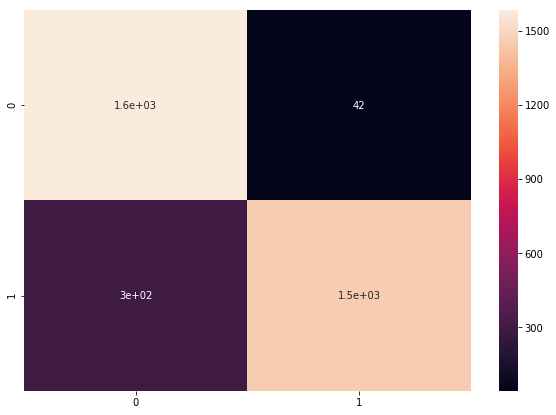

In [23]:
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

Pour voir des graphiques de la précision et le Loss par le biais de TensorBoard, il faut executer le code ci-dessous: 

In [24]:
TB()


E0717 18:37:29.247888 MainThread program.py:260] TensorBoard attempted to bind to port 6006, but it was already in use
TensorBoard attempted to bind to port 6006, but it was already in use


################SVM Linear and kernel##############################

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report

In [32]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-1, 1, 10], 'C': [1e-3, 1e-1, 1, 10]},  {'kernel': ['linear'], 'C': [1e-3, 1e-1, 1, 10], 'class_weight':['balanced']}]

metrics = ['precision', 'recall']

In [33]:
    # create model
model_SVC = SVC( decision_function_shape='ovo', probability=True, random_state=None, cache_size=4096)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=None)

In [34]:
# For the SVM we need a single label instead of binary (OHE) outputs
from numpy import argmax
Ytrain2 = argmax(Ytrain, axis=1)
Yvalid2 = argmax(Yvalid, axis=1)
Ytest2 = argmax(Ytest, axis=1)

In [41]:
Ytrain

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [37]:
for metric in metrics:
    print("# Tuning hyper-parameters for %s" % metric)
    print()

    tuned_model = GridSearchCV(model_SVC, tuned_parameters, cv=cv, scoring='%s_macro' % metric, n_jobs=12)
    tuned_model.fit(Xtrain, Ytrain2)

    print("Best parameters set found on development set:")
    print()
    print(tuned_model.best_params_)
    print()

# Tuning hyper-parameters for precision



/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  '

/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/alexandre/miniconda3/envs/gti770/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  '

Best parameters set found on development set:

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}



In [48]:
# once the best hyperparameters are found, we use them train our model as per below:
#: We need to optimal_C and optimal gamma from the "tuned model best parameters"   

tbcallback = TensorBoard(log_dir='./logs/SVC_Optimal', histogram_freq=0, write_graph=True, write_images=True) 
    
model_SVC_optimal = SVC(C=10, gamma=1, probability=True)
model_SVC_optimal.fit(Xtrain, Ytrain2)   

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
# Validate the model  
y_true, y_pred = Yvalid2, model_SVC_optimal.predict(Xvalid)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.97      0.85      1627
          1       0.97      0.70      0.81      1755

avg / total       0.86      0.83      0.83      3382



In [50]:
# Use the model to predict the class of samples
# Notice that we are testing the train dataset
Ytest_pred = model_SVC_optimal.predict(Xtest)
Ytest_pred


array([0, 0, 0, ..., 1, 1, 0])

In [51]:
# You can also predict the probability of each class
# train dataset
Ytest_pred_prob = model_SVC_optimal.predict_proba(Xtest)
Ytest_pred_prob


array([[7.18324297e-01, 2.81675703e-01],
       [9.99892002e-01, 1.07998066e-04],
       [5.71269592e-01, 4.28730408e-01],
       ...,
       [2.08825715e-01, 7.91174285e-01],
       [5.99936520e-02, 9.40006348e-01],
       [9.99963360e-01, 3.66403717e-05]])

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
# Final evaluation of the model (On the Test dataset)
scores_tuned = accuracy_score(Ytest2, Ytest_pred )
print("Correct classification rate for the training dataset (best model) = "+str(scores_tuned*100)+"%")

Correct classification rate for the training dataset (best model) = 80.72146658781786%


Confusion matrix, without normalization
[[1611   15]
 [ 637 1119]]


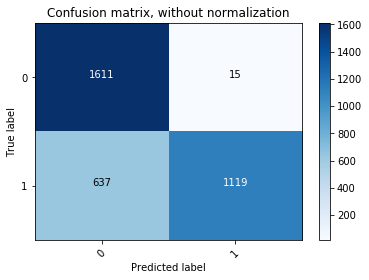

In [54]:
# create and show the confusion matrix (For the Test dataset)
cm = cm(Ytest2, Ytest_pred )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes = ['0','1'],
                      title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[0.99 0.01]
 [0.36 0.64]]


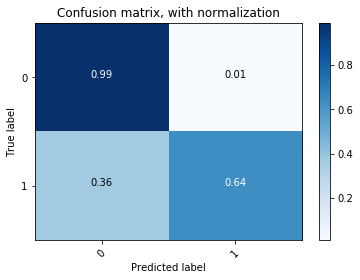

In [55]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes = ['0','1'],
                      normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [56]:
print("Notebook ended")

Notebook ended


**1. Parmi les méthodes de validation (Leave-one-out cross-validation, Leave-p-out cross-validation, k-fold cross-validation), présentez l’approche de validation que vous avez utilisée et pourquoi vous l’avez utilisée. Faites des liens avec les modèles d’apprentissage à l’étude. Rappelez-vous que vous ne devez sélectionner qu’une seule méthode qui servira à la validation des deux modèles à l’études dans ce laboratoire. **

Nous avons pris la méthode de validation Hold-out parce que nous trouvions que c’était la plus simple à utiliser et à comprendre. Étant donnée la taille élevée de l’ensemble de données (environ 16000) et des deux modèles d’apprentissages à l’étude, soit le modèle perceptron et le modèle SVM, la validation Hold-out avec un partitionnement 60-20-20 nous permettait de réaliser l’entraînement dans un temps raisonnable (environ 5 minutes pour les 12 variations d’ hyperparamètre du modèle MLP).

**2. Décrivez la méthode de normalisation de donnés utilisée.**

La méthode de normalisation utilisée par l’équipe dans ce laboratoire est le MinMaxScaler avec les paramètres par défaut. C’est celui que nous avions utilisé dans nos laboratoires précédent. Nous les avons normalisé entre les valeurs 0 et 1. Sans cette normalisation, les algorithmes donne tous un taux de classification correct de 48-52%, probablement dû au fait que la valeur de la première primitive (première colonne) va jusqu’à 100000, et les autres se situent généralement entre [-1, 1] ou [0-100].

**3. Décrivez la structure et le choix de votre modèle d’apprentissage MLP. Faites un parallèle entre votre description et votre implémentation. Quelle est la fonction de coût utilisée ? Pourquoi avez vous utilisé cette fonction plutôt qu’une autre (quels sont les avantages et inconvénients ?)**

Pour trouver les meilleurs hyperparamètres de notre modèle MDP, nous avons créé trois modèles paramétrés avec des valeurs par défaut (ceux de base, inscrits dans l’énoncé) que nous pouvons ensuite ajuster à notre guise. Ceci a permis de créer une boucle où nous compilons un modèle dépendamment de l’itération courante. Cette boucle permet donc de mettre la logique commune, comme le calcul du score et la sauvegarde dans le dossier ‘logs’ pour Tensorboard, à un même endroit.



La fonction de coût utilisée est categorical_crossentropy. Nous avons utilisé celle-ci car c’est elle qui est utilisée dans les exemples données par le professeur, ce qui a comme avantage de nous donner une certitude quand à la bonne implémentation de celle-ci. Un des inconvénients est que nous avons dû ajuster l’ensemble des données en appliquant une petite fonction excel pour transformer l’étiquette en deux colonnes (ex. 0 => 1, 0 et 1 => 0, 1). Nous avons découvert par la suite qu’il était aussi possible d’utiliser la fonction to_categorical pour obtenir le même résultat. Un désavantage est que vu que nous avions utiliser les même partitions d’ensembles pour le modèle SVM, nous avons dû ensuite les reconvertir en entiers à l’aide de la méthode argmax.

**4. Avec les graphiques créés par TensorBoard, après combien d’itérations/epochs êtes-vous en état de surapprentissage [overfitting]? À votre avis, quel est le nombre d’epochs optimal pour votre modèle ?**

En analysant le graphe présentant le loss selon le nombre de epochs généré par TensorBoard, il est possible de voir qu’il dépasse éventuellement la valeur 1.00. Étant donné que le loss est la mesure de l’inconsistance entre la valeur prédite et la vraie valeur, une valeur de 1 est énorme. On peut donc estimer qu’après avoir dépassé cette valeur, il y a eu surapprentissage. En observant le graphe, le point où la valeur du loss dépasse 1.00 peut être estimé à approximativement 45 epochs. L’équipe affirme donc que dépasser 45 itérations serait du surapprentissage.

**5. Pour chacun des modèles d’apprentissage élaborés, présentez sous forme de tableau et de graphique les résultats de la précision (accuracy) et du score F1. Expliquez l’impact des hyperparamètres sur les performances du modèle MLP. Comment se traduisent les divers changements de paramètres ou pourquoi ont-il cet impact sur la performance du modèle ? Expliquer le score F1 que vous avez obtenu en fonction de chaque classe.**

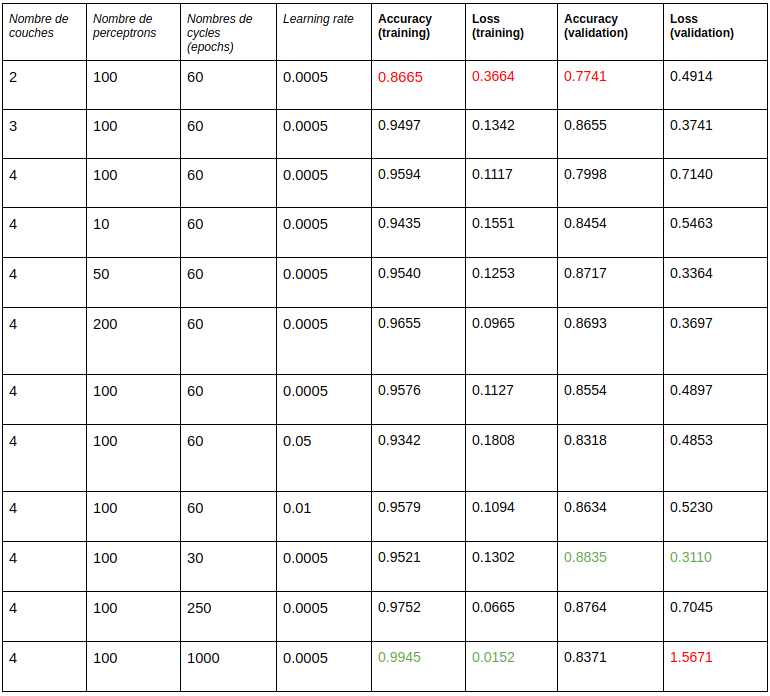

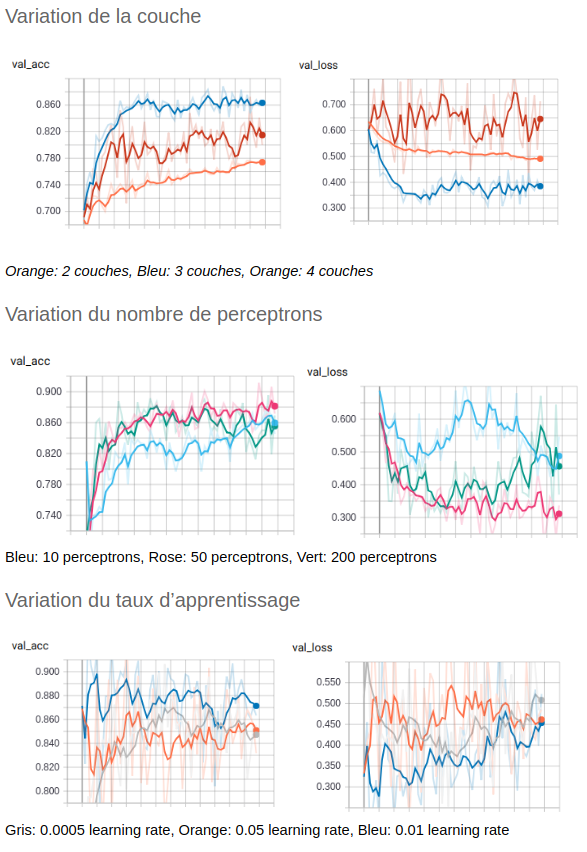

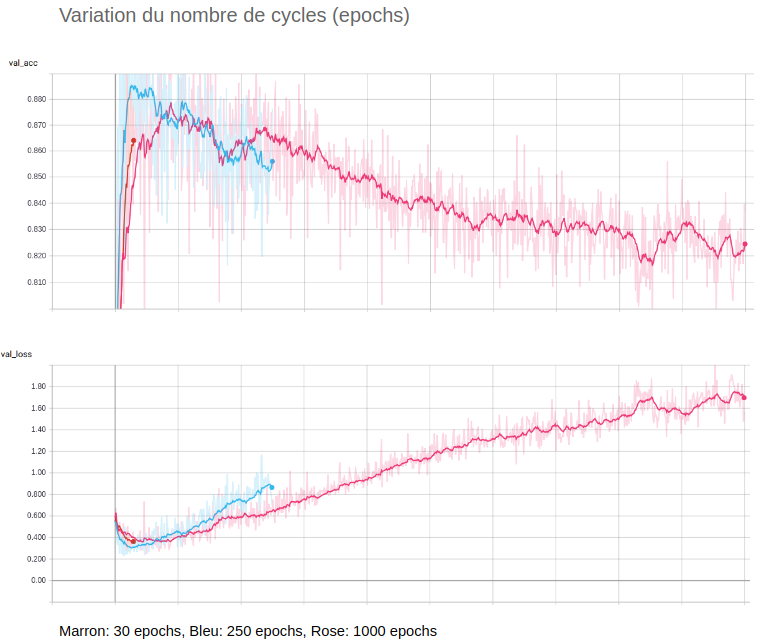

Selon le tableau et les graphes, nous pouvons faires plusieurs observations:

1. Augmenter le nombre de couche jusqu'à 4 offre une amélioration direct au niveau de la performance du modèle (taux de classification meilleur et perte plus basse). Note que nous avions pas testé avec plus de 4 couches

2. Pour les modèles à 4 couches, 50 perceptrons est le nombre offre la meilleur performance vs 10 perceptrons et 200 perceptrons.

3. Le taux d'apprentissage idéal pour notre ensemble de données est 0.0005

4. Un nombre d'epoch élevé permet de bien classifier les données sur lequel le modèle à été entraîner, mais offre une performance abysmale face à l'ensemble de validation à cause de l'overfitting.

**6. Présentez brièvement la méthode que vous avez utilisée afin de trouver le meilleur modèle SVM. Quels ont été vos résultats ? Quels sont les impacts des hyperparamètres et leur utilité respective?**

Pour trouver le meilleur modèle SVM, il fallait d’abord trouver les meilleures valeurs pour chacun des hyperparamètres. L’équipe a donc choisi d’utiliser la fonction de sklearn “GridSearchCV”. Cette fonction a servi à tester les différentes valeurs de chaque paramètre afin de trouver la valeur optimale. Il s’agissait ensuite d’instancier le modèle SVC optimal en lui donnant en paramètres les valeurs trouvées, soit C = 10, Gamma = 1 et Kernel = ‘rbf’
L’hyperparamètre C sert à déterminer l’importance de bien classifier le train data. Plus sa valeur sera grande, plus le modèle tentera de ne pas mal classifier un exemple alors que si sa valeur est petite, le modèle aura quelques erreurs de classification des exemples. Il faut donc trouver la valeur optimale au milieu qui saura bien classifier les exemples sans faire du surapprentissage.
L’hyperparamètre gamma décrit l’importance que l’on accorde à chaque exemple fourni. Plus la valeur de gamma est grande, plus on accordera une importance à chaque point singulier dans le modèle alors qu’une valeur plus petite de gamma viendrait réduire l’importance de l’exemple. Il faut donc que gamma soit assez grand pour comprendre la complexité du data tout en n’étant pas trop grand ce qui causerait un surapprentissage.


**7. Quel est l’impact de la taille de l’ensemble d’apprentissages sur la performance de classification des différents modèles? Inclure dans votre graphique les données des trois algorithmes du laboratoire 2. **

Il est facile d’affirmer que plus la taille de l’ensemble d’apprentissages est grand, plus la performance d’un modèle va augmenter. Les hyperparamètres pourraient changer par contre pour s’ajuster au nouvel ensemble de modèle. Par exemple, pour le modèle SVM, les hyperparamètres C et gamma auraient de nouvelles valeurs optimales qui permettraient d’obtenir un modèle qui serait ajusté à la complexité du data. Avec ces ajustements aux paramètres des modèles, ll y aurait une augmentation de la performance de classification.

**8. Quel type de classificateur recommanderiez-vous pour l’ensemble de données des galaxies et dans quelles conditions (par exemple mais non exhaustif, le nombre de données privilégié, les hyperparamètres, le temps de calcul, le matériel nécessaire, les scores de performance)? Discutez des performances que vous avez obtenues entre les modèles d’apprentissage utilisant les réseaux de neurones et les modèles SVM.**

Pour l’ensemble de données des galaxies, l’équipe recommanderait d’utiliser un réseau de neurone, parce que celui-ci fonctionne bien avec beaucoup de données ce qui est le cas avec les galaxies. Un hyperparamètre important ici serait le nombre de couches du réseau de neurones. Il faudrait un grand nombre de couches pour augmenter la précision. Étant donné que les réseaux de neurones ainsi que les modèles SVM ont eu sensiblement les même résultats dans le laboratoire, l’équipe a déterminé qu’il serait mieux d’opter pour le réseau de neurones pour la quantité énorme de data des galaxies. Comme mentionné dans le numéro 4, le nombre d’itérations devrait être sous 45 pour s’assurer de ne pas avoir un surapprentissage.

**9. Formulez quelques pistes d’amélioration des classificateurs.**

Une première piste d’amélioration serait d’avoir davantage de valeurs à comparer pour les hyperparamètres dans le modèle SVM. Dans le laboratoire, il y a une recherche des valeurs optimales des hyperparamètres, mais cette recherche est limitée par les valeurs que l’on entre. Il faudrait donc que plus de valeurs soient pris en compte. Il faudrait aussi tester davantage d’hyperparamètres pour le modèle SVM. Ici, les valeurs optimales de C et gamma ont été trouvées, mais les valeurs d’autres hyperparamètres pourraient aussi avoir un impact sur la performance du modèle. Finalement, dans le laboratoire, l’équipe a choisi d’utiliser le Hold-Out comme méthode de validation, mais il faudrait choisir une autre méthode de validation pour confirmer la performance des différents modèles comme le LOO par exemple.